# 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/overview/evaluation

# 자료 불러오기

In [2]:
train = pd.read_csv("train_users_2.csv", encoding="cp949")
test = pd.read_csv("test_users.csv", encoding="cp949")
df_1 = pd.read_csv("sessions.csv", encoding="cp949")
df_2 = pd.read_csv("sample_submission_NDF.csv", encoding="cp949")
df_3 = pd.read_csv("countries.csv", encoding="cp949")
df_4 = pd.read_csv("age_gender_bkts.csv", encoding="cp949")

# 데이터 전처리 (train과 test 데이터)

In [3]:
test["id"].head()

0    5uwns89zht
1    jtl0dijy2j
2    xx0ulgorjt
3    6c6puo6ix0
4    czqhjk3yfe
Name: id, dtype: object

In [4]:
print(train.shape)
train.head(2)

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


In [5]:
print(test.shape)
test.head(2)

(62096, 15)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari


## id 컬럼 (삭제, 의미 없음)

In [6]:
# 의미없는 id 컬럼 삭제

train = train.drop(columns="id")
test = test.drop(columns="id")

In [7]:
# 데이터 타입, 결측치 확인

print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 14  coun

## date_first_booking 컬럼 (삭제, test에 값이 없음)

In [8]:
train = train.drop(columns="date_first_booking")
test = test.drop(columns="date_first_booking")

## date_account_created 컬럼 (타입 변경)

In [9]:
# datetime 타입으로 변환

train["date_account_created"] = pd.to_datetime(train["date_account_created"])
test["date_account_created"] = pd.to_datetime(test["date_account_created"])

## timestamp_first_active 컬럼 (시분초 값은 삭제, 타입 변경)

In [10]:
# 시분초 값은 제외

train["timestamp_first_active"] = train["timestamp_first_active"].map(lambda x : str(x)[:8])
test["timestamp_first_active"] = test["timestamp_first_active"].map(lambda x : str(x)[:8])

In [11]:
# 그 값을 다시 datetime 타입으로 변환

train["timestamp_first_active"] = pd.to_datetime(train["timestamp_first_active"])
test["timestamp_first_active"] = pd.to_datetime(test["timestamp_first_active"])

## gender 컬럼 (unknown 값, other 값 처리 의문)

In [12]:
train["gender"].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [13]:
train.loc[train['gender'] == 'OTHER', 'gender'] = '-unknown-'
train.loc[train['gender'] == '-unknown-', 'gender'] = 'unknown'

In [14]:
test.loc[test['gender'] == 'OTHER', 'gender'] = '-unknown-'
test.loc[test['gender'] == '-unknown-', 'gender'] = 'unknown'

## age 컬럼 (결측치 존재, interpolate 사용, 컬럼 생성함)

In [15]:
train.loc[train['age']<10, 'age'] = np.nan
train.loc[train['age']>=100, 'age'] = np.nan

<AxesSubplot:ylabel='Frequency'>

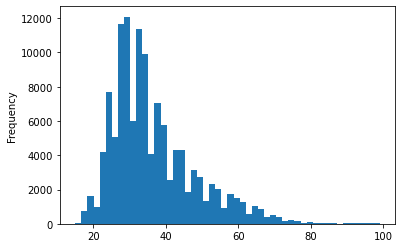

In [16]:
train.age.plot(kind='hist',bins=50)

In [17]:
train['age_unknown'] = train['age'].isna()
train['age_over75%'] = train['age'] > 42
train['age_25-75%'] = (train['age'] > 28) & (train['age'] <= 42)
train['age_under75%'] = train['age'] <= 28

In [18]:
test['age_unknown'] = test['age'].isna()
test['age_over75%'] = test['age'] > 42
test['age_25-75%'] = (test['age'] > 28) & (test['age'] <= 42)
test['age_under75%'] = test['age'] <= 28

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     213451 non-null  datetime64[ns]
 1   timestamp_first_active   213451 non-null  datetime64[ns]
 2   gender                   213451 non-null  object        
 3   age                      123033 non-null  float64       
 4   signup_method            213451 non-null  object        
 5   signup_flow              213451 non-null  int64         
 6   language                 213451 non-null  object        
 7   affiliate_channel        213451 non-null  object        
 8   affiliate_provider       213451 non-null  object        
 9   first_affiliate_tracked  207386 non-null  object        
 10  signup_app               213451 non-null  object        
 11  first_device_type        213451 non-null  object        
 12  first_browser   

## signup_method 컬럼 (결측치 없음, object)

In [20]:
print(train["signup_method"].value_counts())
test["signup_method"].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64


basic       45325
facebook    14856
google       1892
weibo          23
Name: signup_method, dtype: int64

In [21]:
test.loc[test["signup_method"] == "weibo", "signup_method"] = "basic"

## signup_flow 컬럼 (결측치 없음, 의미 없는 데이터로 분류 후 삭제)

In [22]:
train = train.drop(columns="signup_flow")
test = test.drop(columns="signup_flow")

## language 컬럼 (결측치 없음, object, 100 이하의 값들은 Etc로 분류)

In [23]:
# 100 이하의 값들은 Etc로 정리

print(train["language"].nunique())
language_count = train["language"].value_counts()
language_not_Etc = language_count[train["language"].value_counts() > 100].index
train.loc[~train["language"].isin(language_not_Etc), "language"] = "Etc"
print(language_not_Etc)
train["language"].nunique()

25
Index(['en', 'zh', 'fr', 'es', 'ko', 'de', 'it', 'ru', 'pt', 'ja', 'sv'], dtype='object')


12

In [24]:
test.loc[~test["language"].isin(language_not_Etc), "language"] = "Etc"
print(test["language"].value_counts())
test["language"].nunique()

en     59224
zh      1002
ko       369
fr       336
es       259
de       245
Etc      167
ja       120
it       119
ru       119
pt        82
sv        54
Name: language, dtype: int64


12

## affiliate_channel 컬럼 (결측치 없음, object, api 값을 other 항목으로 대체)

In [25]:
print(train["affiliate_channel"].value_counts())
test["affiliate_channel"].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64


direct           43844
sem-brand        10394
seo               5699
sem-non-brand     1231
other              586
remarketing        172
content            170
Name: affiliate_channel, dtype: int64

In [26]:
train.loc[train["affiliate_channel"] == "api", "affiliate_channel"] = "other"

## affiliate_provider 컬럼 (결측치 없음, object, 100개 이하의 값들은 Etc로 분류)

In [27]:
# train 18 / test 17

print(train["affiliate_provider"].unique())
train["affiliate_provider"].value_counts()
aff_pro_count = train["affiliate_provider"].value_counts()
aff_pro_count_Etc = aff_pro_count[train["affiliate_provider"].value_counts() > 100].index
train.loc[~train["affiliate_provider"].isin(aff_pro_count_Etc), "affiliate_provider"] = "Etc"
print(aff_pro_count_Etc)
train["affiliate_provider"].nunique()

['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
Index(['direct', 'google', 'other', 'craigslist', 'bing', 'facebook', 'vast',
       'padmapper', 'facebook-open-graph', 'yahoo', 'gsp', 'meetup',
       'email-marketing'],
      dtype='object')


14

In [28]:
test.loc[~test["affiliate_provider"].isin(aff_pro_count_Etc), "affiliate_provider"] = "Etc"
test["affiliate_provider"].nunique()

14

## first_affiliate_tracked 컬럼 (결측치 있음, object)

In [29]:
train["first_affiliate_tracked_filled"] = train["first_affiliate_tracked"].fillna("-unknown-")
test["first_affiliate_tracked_filled"] = test["first_affiliate_tracked"].fillna("-unknown-")

In [30]:
print(train["first_affiliate_tracked_filled"].value_counts())
test["first_affiliate_tracked_filled"].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
-unknown-          6065
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked_filled, dtype: int64


untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
-unknown-           20
Name: first_affiliate_tracked_filled, dtype: int64

## signup_app 컬럼 (결측치 없음, object)

In [31]:
print(train["signup_app"].value_counts())
test["signup_app"].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64


Web        37201
iOS        15574
Android     5065
Moweb       4256
Name: signup_app, dtype: int64

## first_device_type 컬럼 (결측치 없음, object)

In [32]:
print(train["first_device_type"].value_counts())
test["first_device_type"].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64


iPhone                19055
Mac Desktop           16728
Windows Desktop       14232
Android Phone          6655
iPad                   3697
Android Tablet          806
Other/Unknown           500
Desktop (Other)         308
SmartPhone (Other)      115
Name: first_device_type, dtype: int64

## first_browser 컬럼 (결측치 없음, object, unknown 값도 있고 train과 test 인덱스 값도 다르다. 참고해서 확인하자.)

In [33]:
print(train["first_browser"].value_counts())
test["first_browser"].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
TheWorld B

-unknown-             17128
Chrome                14826
Mobile Safari         10362
Safari                 8133
Firefox                5010
IE                     3676
Chrome Mobile          1916
Android Browser         726
IE Mobile                82
Silk                     48
Opera                    40
BlackBerry Browser       36
Mobile Firefox           34
Maxthon                  14
Chromium                 10
Sogou Explorer           10
AOL Explorer              9
Apple Mail                9
Iron                      7
Opera Mini                4
SiteKiosk                 3
Yandex.Browser            3
Opera Mobile              2
IBrowse                   1
wOSBrowser                1
Pale Moon                 1
Nintendo Browser          1
SeaMonkey                 1
CometBird                 1
IceWeasel                 1
UC Browser                1
Name: first_browser, dtype: int64

In [34]:
first_browser_count = train["first_browser"].value_counts()
first_browser_not_Etc = first_browser_count[train["first_browser"].value_counts() > 100].index
train.loc[~train["first_browser"].isin(first_browser_not_Etc), "first_browser"] = "Etc"

In [35]:
test.loc[~test["first_browser"].isin(first_browser_not_Etc), "first_browser"] = "Etc"

## country_destination 컬럼 (결측치 없음, object, label 컬럼, NDF = No Destinatio Found, 목적지를 찾을 수 없는 경우)

In [36]:
train["country_destination"].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

## 날짜 형식 인코딩 ("date_account_created" = "DAC" / "timestamp_first_active" = "TFA")

In [37]:
train["DAC_Y"] = train["date_account_created"].dt.year
train["DAC_M"] = train["date_account_created"].dt.month
# train["DAC_D"] = train["date_account_created"].dt.day
train["TFA_Y"] = train["timestamp_first_active"].dt.year
train["TFA_M"] = train["timestamp_first_active"].dt.month
# train["TFA_D"] = train["timestamp_first_active"].dt.day

In [38]:
test["DAC_Y"] = test["date_account_created"].dt.year
test["DAC_M"] = test["date_account_created"].dt.month
# test["DAC_D"] = test["date_account_created"].dt.day
test["TFA_Y"] = test["timestamp_first_active"].dt.year
test["TFA_M"] = test["timestamp_first_active"].dt.month
# test["TFA_D"] = test["timestamp_first_active"].dt.day

# 제출할 sample 파일 확인

In [39]:
df_2.head(3)

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF


In [40]:
df_2.tail(3)

,id,country
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF
62095,9uqfg8txu3,NDF


# train과 test로만 머신러닝 수행

## label name과 feature 변수로 학습시키기

In [41]:
label_name = "country_destination"
label_name

'country_destination'

In [42]:
categorical_features = ["gender", "signup_method", "language", "affiliate_channel", "affiliate_provider", 
                       "first_affiliate_tracked", "signup_app", "first_device_type", "first_browser"]

train[categorical_features] = train[categorical_features].astype('category')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date_account_created            213451 non-null  datetime64[ns]
 1   timestamp_first_active          213451 non-null  datetime64[ns]
 2   gender                          213451 non-null  category      
 3   age                             123033 non-null  float64       
 4   signup_method                   213451 non-null  category      
 5   language                        213451 non-null  category      
 6   affiliate_channel               213451 non-null  category      
 7   affiliate_provider              213451 non-null  category      
 8   first_affiliate_tracked         207386 non-null  category      
 9   signup_app                      213451 non-null  category      
 10  first_device_type               213451 non-null  categor

In [44]:
feature_names = ["DAC_Y", "DAC_M", "TFA_Y", "TFA_M", 'gender', 
               'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
               'signup_app', 'first_device_type', 'first_browser', 
               'age_unknown', 'age_over75%', 'age_25-75%', 'age_under75%', 
               'first_affiliate_tracked_filled']
train[feature_names].head()

,DAC_Y,DAC_M,DAC_D,TFA_Y,TFA_M,TFA_D,gender,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,age_unknown,age_over75%,age_25-75%,age_under75%,first_affiliate_tracked_filled
0,2010,6,28,2009,3,19,unknown,facebook,en,direct,direct,Web,Mac Desktop,Chrome,True,False,False,False,untracked
1,2011,5,25,2009,5,23,MALE,facebook,en,seo,google,Web,Mac Desktop,Chrome,False,False,True,False,untracked
2,2010,9,28,2009,6,9,FEMALE,basic,en,direct,direct,Web,Windows Desktop,IE,False,True,False,False,untracked
3,2011,12,5,2009,10,31,FEMALE,facebook,en,direct,direct,Web,Mac Desktop,Firefox,False,False,True,False,untracked
4,2010,9,14,2009,12,8,unknown,basic,en,direct,direct,Web,Mac Desktop,Chrome,False,False,True,False,untracked


In [45]:
X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
print(X_train.isnull().sum().sum())
X_train.head(2)

(213451, 82)
0


,DAC_Y,DAC_M,DAC_D,TFA_Y,TFA_M,TFA_D,age_unknown,age_over75%,age_25-75%,age_under75%,...,first_browser_Safari,first_browser_Silk,first_affiliate_tracked_filled_-unknown-,first_affiliate_tracked_filled_linked,first_affiliate_tracked_filled_local ops,first_affiliate_tracked_filled_marketing,first_affiliate_tracked_filled_omg,first_affiliate_tracked_filled_product,first_affiliate_tracked_filled_tracked-other,first_affiliate_tracked_filled_untracked
0,2010,6,28,2009,3,19,True,False,False,False,...,0,0,0,0,0,0,0,0,0,1
1,2011,5,25,2009,5,23,False,False,True,False,...,0,0,0,0,0,0,0,0,0,1


In [46]:
X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
print(X_test.isnull().sum().sum())
X_test.head(2)

(62096, 82)
0


,DAC_Y,DAC_M,DAC_D,TFA_Y,TFA_M,TFA_D,age_unknown,age_over75%,age_25-75%,age_under75%,...,first_browser_Safari,first_browser_Silk,first_affiliate_tracked_filled_-unknown-,first_affiliate_tracked_filled_linked,first_affiliate_tracked_filled_local ops,first_affiliate_tracked_filled_marketing,first_affiliate_tracked_filled_omg,first_affiliate_tracked_filled_product,first_affiliate_tracked_filled_tracked-other,first_affiliate_tracked_filled_untracked
0,2014,7,1,2014,7,1,False,False,True,False,...,0,0,0,0,0,0,0,0,0,1
1,2014,7,1,2014,7,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(213451,)


0    NDF
1    NDF
Name: country_destination, dtype: object

## 결정나무 머신러닝

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=100, max_features=80)
model

DecisionTreeClassifier(max_depth=10, max_features=80, min_samples_leaf=100,
                       random_state=42)

In [49]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

df_cross = pd.DataFrame(cross_validate(model, X_train, y_train, cv=10))

In [50]:
df_cross["test_score"].mean()

0.3112982971262429

## train_test_split 모듈을 이용해서 분리 작업

In [51]:
X = pd.get_dummies(train[feature_names])
y = train['country_destination']

X.shape, y.shape

((213451, 82), (213451,))

In [52]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, random_state=41, stratify=y)

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(XX_train, yy_train)

RandomForestClassifier()

In [54]:
y_RF_predict = RF.predict(XX_test)
(y_RF_predict == yy_test).mean()

0.5670033543841239

## xgboost 사용

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_xgb_train = le.fit_transform(yy_train)  
y_xgb_test = le.fit_transform(yy_test)
XX_train.shape, y_xgb_train.shape, yy_test.shape, y_xgb_test.shape

((160088, 82), (160088,), (53363,), (53363,))

In [56]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(XX_train, y_xgb_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [57]:
y_xgb_predict = xgb.predict(XX_test)
xgb_score = (y_xgb_predict == y_xgb_test).mean()
(y_xgb_predict == y_xgb_test).mean()

0.6332852350879823

In [58]:
"""

# 나이브 베이스
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

"""

'\n\n# 나이브 베이스\nfrom sklearn.naive_bayes import BernoulliNB\n\nbnb = BernoulliNB()\nbnb.fit(X_train, y_train)\n\nsns.barplot(x=model.feature_importances_, y=model.feature_names_in_)\n\n'

# 제출하기

In [59]:
pre_sub = xgb.predict(X_test)
sub_con = le.inverse_transform(pre_sub).tolist()
final_con = pd.Series(data=sub_con)
final_con_2 = pd.concat([df_2, final_con], axis=1)
final_con_2 = final_con_2.drop(columns="country")
final_con_2.columns = ["id", "country"]

In [60]:
final_con_2

,id,country
0,5uwns89zht,US
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,US
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [61]:
file_name = f"xgb_{xgb_score:.4f}.csv"
final_con_2.to_csv(f"score_{file_name}", index=False)